In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import csv
import gc
import gzip
import pickle
from pathlib import Path 
import sqlite3
import re
import string

## Load data and insert into SQlite DB from FULL source 
- 2022-2023, mix of retweets, all languages

In [2]:
csv_collection = []
for dirname, _, filenames in os.walk('D:\PENNSTATE_GIS\CAPSTONE!\Data_1'):
    filenames.sort()
    for filename in filenames:
        fullpath = os.path.join(dirname, filename)
        csv_collection.append(fullpath)
print("Length of files:", len(csv_collection))

Length of files: 461


In [3]:
# Connect to the SQLite database
conn = sqlite3.connect(r'D:\PENNSTATE_GIS\CAPSTONE!\sql_db_lite\full_tweets.db')
cursor = conn.cursor()

### Load into the database - commented out so not accidentialy loaded again

In [4]:
# # columns = ["tweetcreatedts","extractedts","tweetid"]

# csv_collection.sort()
# dataframe_collection_1 = []

# for csvfile in csv_collection:
#     try:
#         df = pd.read_csv(csvfile, engine='python', compression='gzip',encoding='utf-8', quoting=csv.QUOTE_ALL)  #, usecols=lambda x: x in columns
#         df.to_sql('full_tweets', conn, if_exists='append', index=False)
#     except:
#         query = """SELECT * from full_tweets LIMIT 1"""
#         df_for_cols = pd.read_sql(query, conn)
#         col_lst = list(df_for_cols.columns)
#         df = df[col_lst]
#         df.to_sql('full_tweets', conn, if_exists='append', index=False)
        
# df = None
# del df
# gc.collect()

# conn.commit()
# conn.close()

In [5]:
# It's 70+ Million tweets
query = """SELECT count(*) from full_tweets"""
pd.read_sql(query, conn)

,count(*)
0,70876102


In [6]:
query = """SELECT * from full_tweets  LIMIT 5"""
df = pd.read_sql(query, conn)
df

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],en,None,0,2022-04-01 00:44:20.097867
1,1,3205296069,gregffff,None,None,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,None,0,2022-04-01 00:09:37.148770
2,2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,None,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,None,0,2022-04-01 00:09:37.125654
3,3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,None,0,2022-04-01 00:31:39.674382
4,4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,None,0,2022-04-01 00:09:37.101459


In [7]:
list(df.columns)

['Unnamed: 0',
 'userid',
 'username',
 'acctdesc',
 'location',
 'following',
 'followers',
 'totaltweets',
 'usercreatedts',
 'tweetid',
 'tweetcreatedts',
 'retweetcount',
 'text',
 'hashtags',
 'language',
 'coordinates',
 'favorite_count',
 'extractedts']

In [ ]:
# df_combined_1 = pd.concat(dataframe_collection_1, axis=0)
# df_combined_1['tweetcreatedts'] = pd.to_datetime(df_combined_1['tweetcreatedts'], errors='coerce')
# df_combined_1['extractedts'] = pd.to_datetime(df_combined_1['extractedts'], errors='coerce') 
# df_combined_1.reset_index(inplace=True, drop=True)

In [ ]:
# df_combined.sort_values(["tweetid","extractedts"], ascending=True,inplace=True)
# df_combined.drop_duplicates(["tweetid"],keep='last',inplace=True)
# df_combined.sort_values(['tweetcreatedts',"tweetid"], ascending=True,inplace=True) 
# df_combined.reset_index(drop=True, inplace=True)
# gc.collect()

In [21]:
conn.close()

## Load data from FILTERED source - Only 2022, no retweets, english only, at least one hashtag

In [112]:
csv_collection = []
for dirname, _, filenames in os.walk('D:\PENNSTATE_GIS\CAPSTONE!\Data_2'):
    filenames.sort()
    for filename in filenames:
        fullpath = os.path.join(dirname, filename)
        csv_collection.append(fullpath)
print("Length of files:", len(csv_collection))

Length of files: 300


In [113]:
# Connect to the SQLite database
conn = sqlite3.connect(r'D:\PENNSTATE_GIS\CAPSTONE!\sql_db_lite\no_retweets.db')
cursor = conn.cursor()

### Load into the database - commented out so not accidentialy loaded again

In [40]:
# csv_collection.sort()
# dataframe_collection_2 = []

# for csvfile in csv_collection:
#     try:
#         with gzip.open(csvfile, 'rb') as f:
#             df_file = pickle.load(f)
# #         dataframe_collection_2.append(df_file)
#         df_file.to_sql('no_retweets', conn, if_exists='append', index=False)
#     except:
#         pass

# df = None
# del df
# gc.collect()

# conn.commit()
# conn.close()

In [19]:
# df_combined_2 = pd.concat(dataframe_collection_2, axis=0)
# df_combined_2['tweetcreatedts'] = pd.to_datetime(df_combined_2['tweetcreatedts'], errors='coerce')
# # df_combined['extractedts'] = pd.to_datetime(df_combined['extractedts'], errors='coerce') 
# df_combined_2.reset_index(inplace=True, drop=True)

In [23]:
query = """SELECT count(*) from no_retweets"""
pd.read_sql(query, conn)

,count(*)
0,11952654


In [46]:
query = """SELECT * from no_retweets LIMIT 5"""
df = pd.read_sql(query, conn)
df

,location,tweetid,tweetcreatedts,retweetcount,text,hashtags
0,None,1509681950151348229,2022-04-01 00:00:00,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9..."
1,None,1509681952000937999,2022-04-01 00:00:00,1,The Amazing story of Former Sussex County Dela...,"[{'text': 'Russia', 'indices': [208, 215]}, {'..."
2,None,1509681953091457035,2022-04-01 00:00:00,3,The most basic tenet of what stability exists ...,"[{'text': 'Ukraine', 'indices': [209, 217]}]"
3,"Kurdistan, Worldwide",1509681953418711050,2022-04-01 00:00:00,0,"""The image that Russia acquired over the past ...","[{'text': 'Putin', 'indices': [69, 75]}, {'tex..."
4,Dubai,1509681953418752008,2022-04-01 00:00:00,5,#Russia’s President Vladimir #Putin says he ha...,"[{'text': 'Russia', 'indices': [0, 7]}, {'text..."


In [96]:
query = """SELECT * from no_retweets
            WHERE tweetcreatedts BETWEEN '2022-06-01 00:00:00' AND '2022-08-31 00:00:00'"""
df = pd.read_sql(query, conn)
df

,location,tweetid,tweetcreatedts,retweetcount,text,hashtags
0,The Poletti Group LLC is a company out of Star...,1531787610854608898,2022-06-01 00:00:00,0,#ArchaicAgeofDarkess #tabletopgames #ttrpgcomm...,"[{'text': 'ArchaicAgeofDarkess', 'indices': [0..."
1,"Florence, SC",1531787611337068544,2022-06-01 00:00:00,0,#dailymotivation It doesn't matter how much y...,"[{'text': 'dailymotivation', 'indices': [0, 16..."
2,"Beijing,China",1531787611978625027,2022-06-01 00:00:00,0,Still remember our #innovative #business model...,"[{'text': 'innovative', 'indices': [19, 30]}, ..."
3,None,1531787611978846209,2022-06-01 00:00:00,0,⚽️Algovenger World Cup Soccer⚽️\n\nLet’s Go!!!...,"[{'text': 'USA', 'indices': [71, 75]}, {'text'..."
4,Worldwide,1531787612431826945,2022-06-01 00:00:00,2,Assassins Creed Origins 60FPS Update Coming Th...,"[{'text': 'AssassinsCreedOrigins', 'indices': ..."
...,...,...,...,...,...,...
3159391,None,1564402420712583168,2022-08-29 23:59:36,0,@fannisjaye And all who violated the treaty re...,"[{'text': 'BillBarr', 'indices': [64, 73]}, {'..."
3159392,IG: earnyourleisure,1564402424663752707,2022-08-29 23:59:37,6,Comment your thoughts 💭. We are now live for M...,"[{'text': 'china', 'indices': [124, 130]}, {'t..."
3159393,None,1564402493748117506,2022-08-29 23:59:54,0,@USEnvoyIran regime occupying #Iran needs more...,"[{'text': 'Iran', 'indices': [30, 35]}, {'text..."
3159394,None,1564402519631175680,2022-08-30 00:00:00,0,The sunlight has waken up the city of #Shenzhe...,"[{'text': 'Shenzhen', 'indices': [38, 47]}, {'..."


In [97]:
tids = df['tweetid'].to_list()

In [ ]:
# df_combined.sort_values(["tweetid","extractedts"], ascending=True,inplace=True)
# df_combined.drop_duplicates(["tweetid"],keep='last',inplace=True)
# df_combined.sort_values(['tweetcreatedts',"tweetid"], ascending=True,inplace=True) 
# df_combined.reset_index(drop=True, inplace=True)
# gc.collect()

In [37]:
conn.close()

## Free up some resources

In [17]:
dataframe_collection_2 = None
del dataframe_collection_2
dataframe_collection_1 = None
del dataframe_collection_1
df_combined_2 = None
del df_combined_2
df = None
del df
full = None
del full

gc.collect()

0

## Let's get the tweet counts in a weekly basis

In [118]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

df_combined.set_index('tweetcreatedts', drop=False, inplace=True)
df_combined.index = pd.to_datetime(df_combined.index)
df_weekly_aggregated = df_combined['tweetid'].groupby(pd.Grouper(freq='1w')).count()
df_weekly_aggregated.tail(20)

tweetcreatedts
2022-08-21    151872
2022-08-28    170572
2022-09-04    170744
2022-09-11    189659
2022-09-18    207937
2022-09-25    224344
2022-10-02    202504
2022-10-09    208102
2022-10-16    237861
2022-10-23    173040
2022-10-30    197686
2022-11-06    165413
2022-11-13    189730
2022-11-20    205980
2022-11-27    219933
2022-12-04    179587
2022-12-11    183810
2022-12-18    170483
2022-12-25    227479
2023-01-01     22815
Freq: W-SUN, Name: tweetid, dtype: int64

## Graph the per week tweet count - on FULL tweets, no subsetting

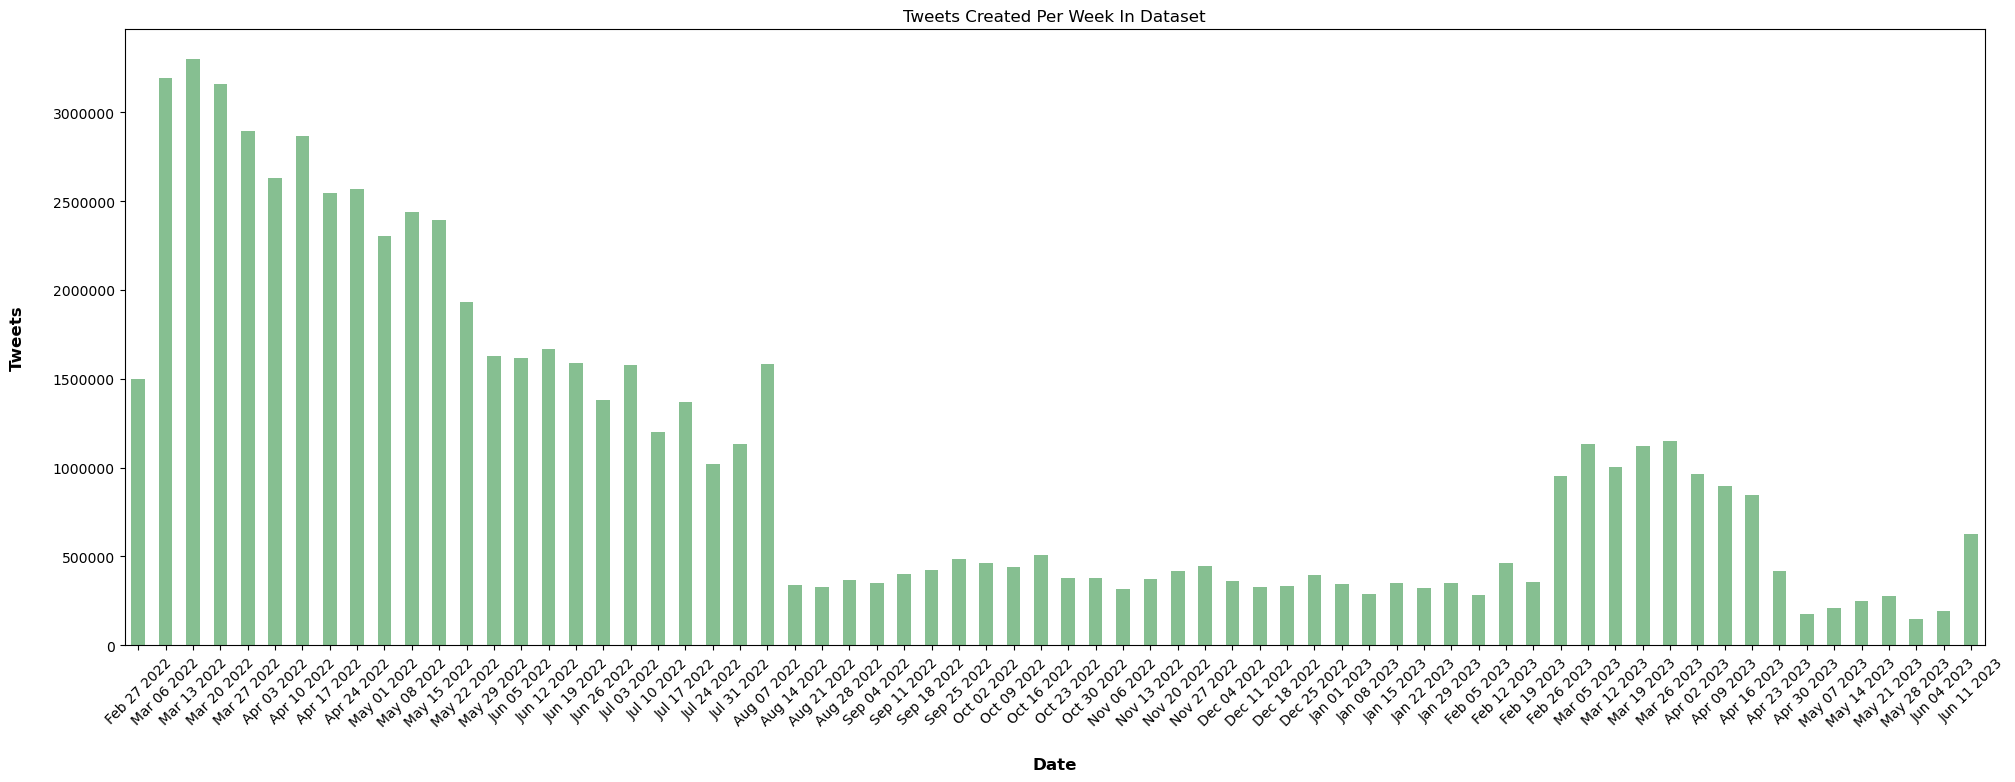

In [11]:
ax = df_weekly_aggregated.plot(kind='bar', grid=False, figsize=(24,8), color='#86bf91', zorder=2, rot=45)

ax.set_title("Tweets Created Per Week In Dataset")
ax.set_xlabel("Date", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Tweets", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.set_xticklabels([x.strftime("%b %d %Y") for x in df_weekly_aggregated.index])
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.show()

## Graph the per week tweet count - on FILTERED tweets

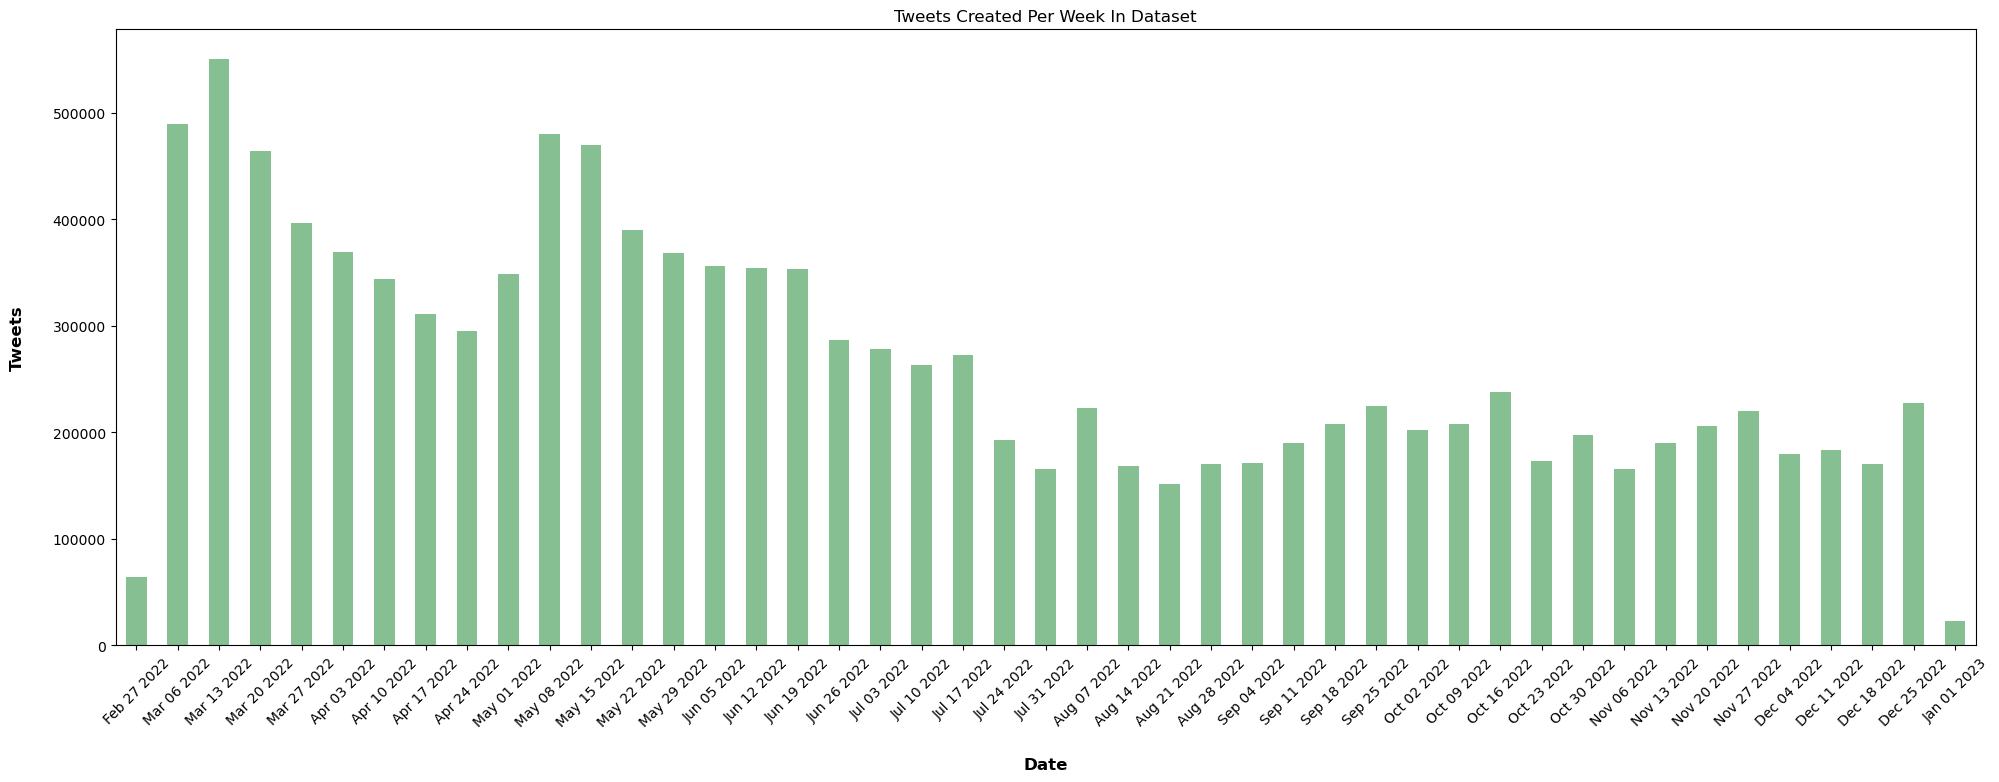

In [119]:
ax = df_weekly_aggregated.plot(kind='bar', grid=False, figsize=(24,8), color='#86bf91', zorder=2, rot=45)

ax.set_title("Tweets Created Per Week In Dataset")
ax.set_xlabel("Date", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Tweets", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.set_xticklabels([x.strftime("%b %d %Y") for x in df_weekly_aggregated.index])
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.show()